In [1]:
import pandas as pd
# save filepath to variable for easier access
melbourne_file_path = '/Users/lofang/Desktop/python/csv files/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
melbourne_data = melbourne_data.dropna(axis=0)

In [4]:
y=melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
x=melbourne_data[melbourne_features]
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [5]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [5]:
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [6]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(melbourne_model.predict(x.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [7]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(x)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)#保证程序每次运行都分割一样的训练集合测试集if=1 ,if=0,不一樣
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_x, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))


273065.8760490639


In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


In [11]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_x, val_x, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores,key=scores.get)

In [12]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_x, train_y)
melb_preds = forest_model.predict(val_x)
print(mean_absolute_error(melb_preds,val_y))

207190.6873773146


In [1]:
#iris
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = pd.read_csv('/Users/lofang/Desktop/python/csv files/Iris.csv')

In [2]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
iris["Id","SepalLengthCm"]

KeyError: ('Id', 'SepalLengthCm')

In [4]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

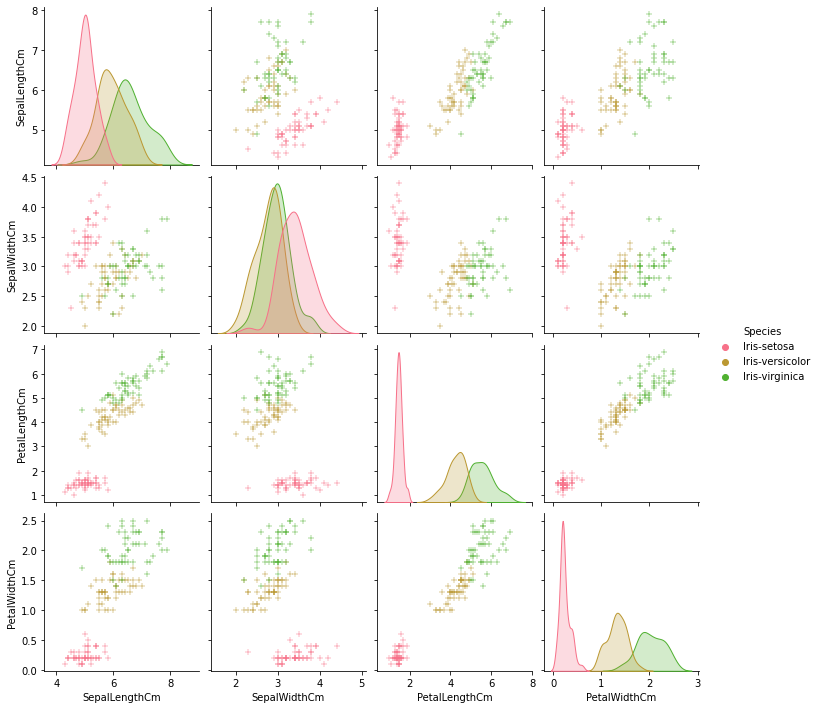

In [5]:
tmp = iris.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')#hue:name of variable in data
plt.show()
# #markerssingle matplotlib marker code or list
# Either the marker to use for all scatterplot points or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

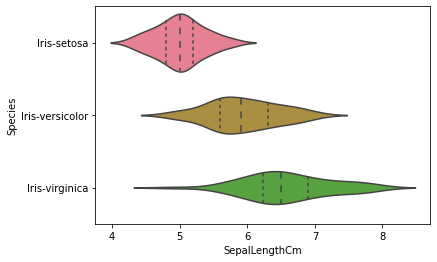

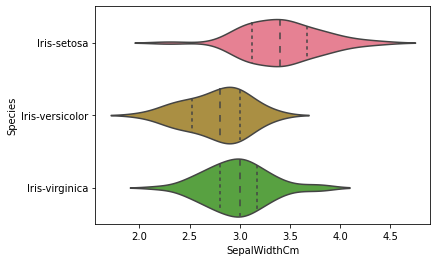

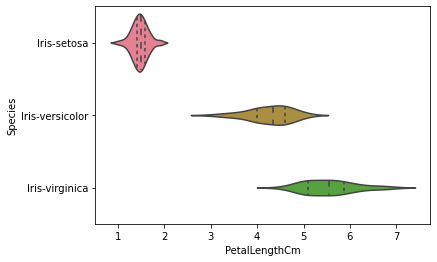

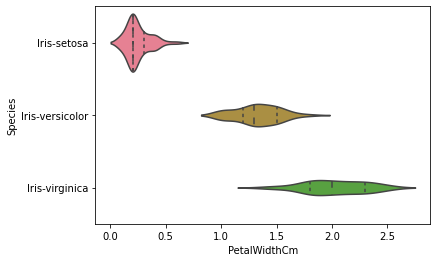

In [6]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()
#inner: Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

In [7]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)


(150, 4)
(150,)


In [8]:
#Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


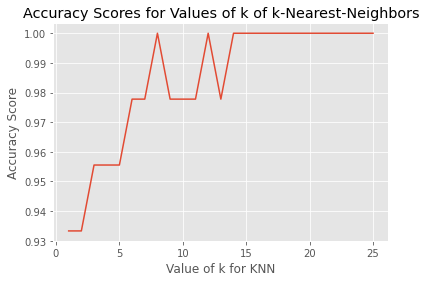

In [9]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.style.use('ggplot')
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [10]:
def get_best_score(k, X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    accuracy = model.score(X_test,y_test)
    return(accuracy)

In [11]:
for i in k_range:
    my_best_score = get_best_score(i, X_train, X_test, y_train, y_test)
    print("Max K value:",i,":",my_best_score)

Max K value: 1 : 0.9333333333333333
Max K value: 2 : 0.9333333333333333
Max K value: 3 : 0.9555555555555556
Max K value: 4 : 0.9555555555555556
Max K value: 5 : 0.9555555555555556
Max K value: 6 : 0.9777777777777777
Max K value: 7 : 0.9777777777777777
Max K value: 8 : 1.0
Max K value: 9 : 0.9777777777777777
Max K value: 10 : 0.9777777777777777
Max K value: 11 : 0.9777777777777777
Max K value: 12 : 1.0
Max K value: 13 : 0.9777777777777777
Max K value: 14 : 1.0
Max K value: 15 : 1.0
Max K value: 16 : 1.0
Max K value: 17 : 1.0
Max K value: 18 : 1.0
Max K value: 19 : 1.0
Max K value: 20 : 1.0
Max K value: 21 : 1.0
Max K value: 22 : 1.0
Max K value: 23 : 1.0
Max K value: 24 : 1.0
Max K value: 25 : 1.0


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [13]:
logreg.predict([[5, 3, 2, 6]])

array(['Iris-virginica'], dtype=object)

In [14]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# make a prediction for an example of an out-of-sample observation
knn.predict([[5, 3, 2, 6]])

array(['Iris-versicolor'], dtype=object)

In [14]:
knn.score(X_test,y_test)

1.0

In [15]:
print(knn.predict(X_test.head()))
print(y_test.head())

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']
82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
Name: Species, dtype: object


In [16]:
from sklearn import svm
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
svm_model=svm.SVC(kernel='poly',gamma='auto',C=10)
svm_model.fit(X_train,y_train)
svm_model.predict([[5, 3, 2, 6]])

array(['Iris-virginica'], dtype=object)

In [18]:
svm_model.score(X_test,y_test)

0.9777777777777777

In [4]:
#studentgrade
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv('/Users/lofang/Desktop/python/csv files/StudentsPerformance.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


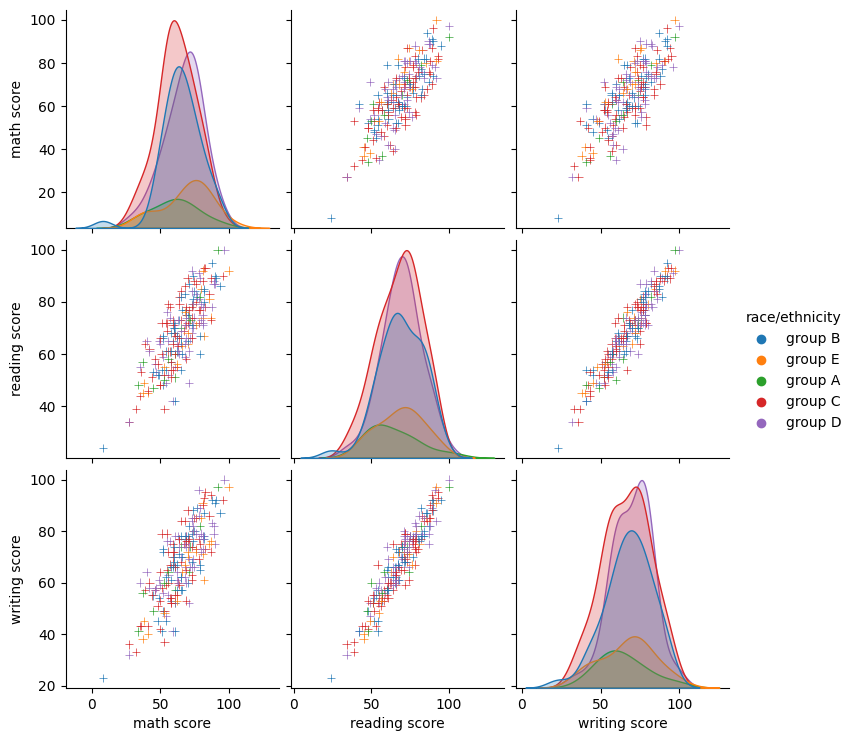

In [7]:
tmp = data.sample(200)
g = sns.pairplot(tmp, hue='race/ethnicity', markers='+')
plt.show()

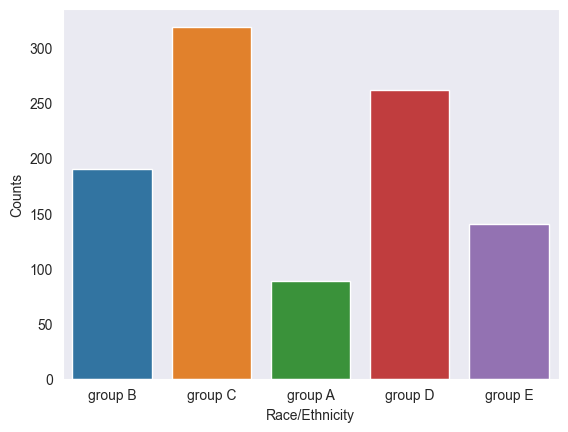

In [8]:
sns.set_style("dark")
sns.countplot(x="race/ethnicity",data=data)
plt.xlabel("Race/Ethnicity")
plt.ylabel("Counts")
plt.show()

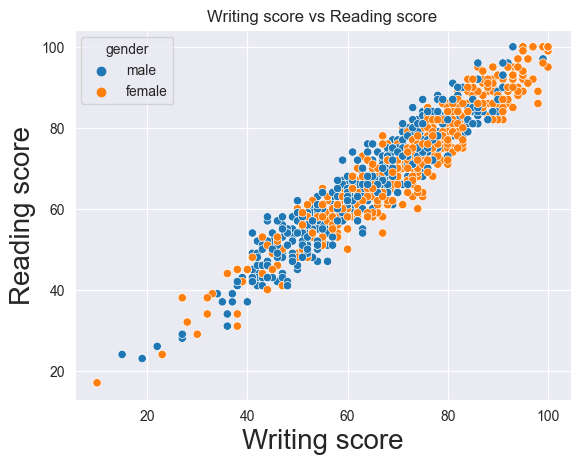

In [9]:
sns.set_style("darkgrid")
plt.title("Writing score vs Reading score")
plt.xlabel('Writing score',size=20)
plt.ylabel('Reading score',size=20)
sns.scatterplot(x='writing score',y='reading score',data=data,hue='gender',hue_order=['male','female'])
plt.show()

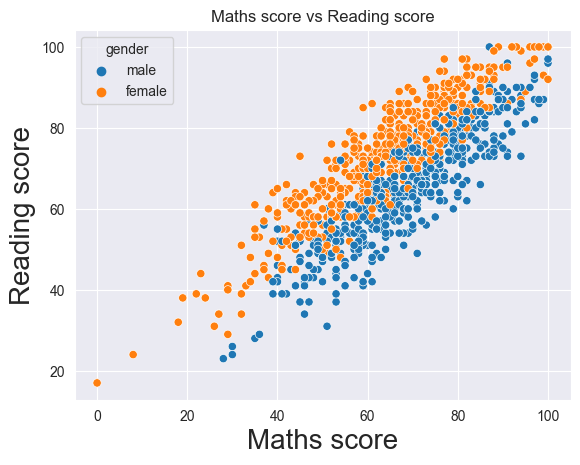

In [10]:
sns.set_style("darkgrid")
plt.title("Maths score vs Reading score")
plt.xlabel('Maths score',size=20)
plt.ylabel('Reading score',size=20)
sns.scatterplot(x='math score',y='reading score',data=data,hue='gender',hue_order=['male','female'])
plt.show()

In [11]:
total_marks=((data['math score']+data['reading score']+data['writing score'])/300)*100
data['total_marks']=total_marks
data2=data[['math score','reading score', 'writing score','total_marks']]

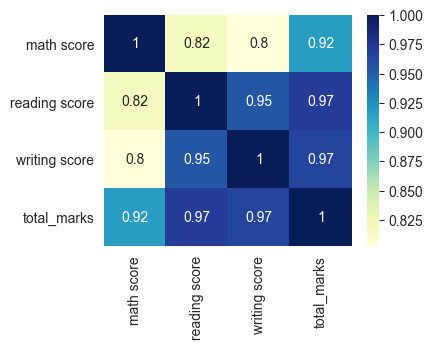

In [12]:
plt.figure(figsize=(4,3))
sns.heatmap(data2.corr(),annot=True,cmap='YlGnBu')
plt.show()

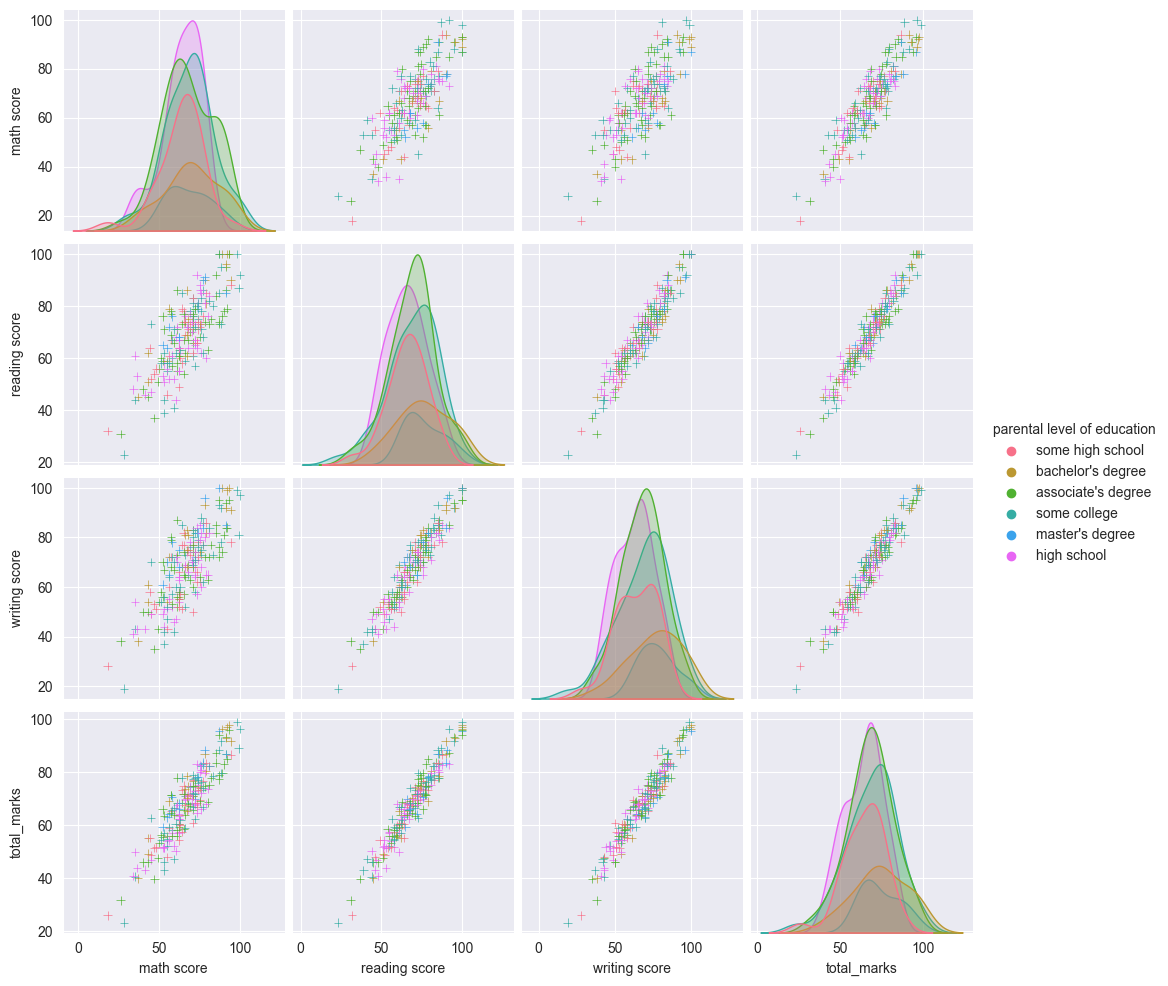

In [13]:
tmp = data.sample(200)
sns.set_palette('husl')
g = sns.pairplot(tmp, hue='parental level of education', markers='+')
plt.show()

In [14]:
y_feature=['math score']
y=data[y_feature]
x_feature = ['reading score','writing score']
x=data[x_feature]
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(1000, 2)
(1000, 1)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(600, 2)
(600, 1)
(400, 2)
(400, 1)


In [16]:
score_model = DecisionTreeRegressor(random_state=1)
# Fit model
score_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [17]:
print("Making predictions for the following 5 students:")
print(x.head(10))
print("The predictions are")
print(score_model.predict(x.head(10)))

Making predictions for the following 5 students:
   reading score  writing score
0             72             74
1             90             88
2             95             93
3             57             44
4             78             75
5             83             78
6             95             92
7             43             39
8             64             67
9             60             50
The predictions are
[66.         76.25       90.         49.         76.         74.33333333
 88.         34.         64.         38.        ]


In [18]:
from sklearn.metrics import mean_absolute_error

predicted_score = score_model.predict(x)
mean_absolute_error(y, predicted_score)

5.236066666666668

In [19]:
cat_feats = ['parental level of education','test preparation course','race/ethnicity']
data2 = pd.get_dummies(data,columns=cat_feats,drop_first=True)
data2

,gender,lunch,math score,reading score,writing score,total_marks,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,standard,72,72,74,72.666667,1,0,0,0,0,1,1,0,0,0
1,female,standard,69,90,88,82.333333,0,0,0,1,0,0,0,1,0,0
2,female,standard,90,95,93,92.666667,0,0,1,0,0,1,1,0,0,0
3,male,free/reduced,47,57,44,49.333333,0,0,0,0,0,1,0,0,0,0
4,male,standard,76,78,75,76.333333,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,standard,88,99,95,94.000000,0,0,1,0,0,0,0,0,0,1
996,male,free/reduced,62,55,55,57.333333,0,1,0,0,0,1,0,1,0,0
997,female,free/reduced,59,71,65,65.000000,0,1,0,0,0,0,0,1,0,0
998,female,standard,68,78,77,74.333333,0,0,0,1,0,0,0,0,1,0


In [20]:
x=data2.drop(['gender','lunch','math score',],axis=1)
y=data2['math score']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(1000, 13)
(1000,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(600, 13)
(600,)
(400, 13)
(400,)


In [22]:
score_model2=RandomForestRegressor(random_state=1)
score_model2.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [23]:
print("Making predictions for the following 5 students:")
print(data2['math score'].head(10))
print("The predictions are")
print(score_model2.predict(x.head(10)))

Making predictions for the following 5 students:
0    72
1    69
2    90
3    47
4    76
5    71
6    88
7    40
8    64
9    38
Name: math score, dtype: int64
The predictions are
[71.65 70.55 90.86 46.13 75.95 71.09 90.34 39.82 63.38 39.96]


In [24]:
print(score_model2.score(x_test,y_test))

0.953064950033583


In [25]:
data['predicted math score']=predicted_score
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,predicted math score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,66.00
1,female,group C,some college,standard,completed,69,90,88,82.333333,76.25
2,female,group B,master's degree,standard,none,90,95,93,92.666667,90.00
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,49.00
4,male,group C,some college,standard,none,76,78,75,76.333333,76.00


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


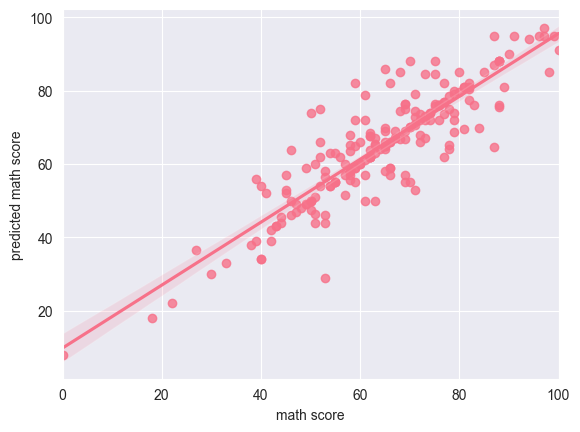

In [26]:
sns.set_style("darkgrid")
sns.regplot(data['math score'].head(200),data['predicted math score'].head(200))
plt.show()